# Federico Campanozzi - Progetto Data Intensive con Relazione
                                                                                                             a.a. 2021/2022

## 1 - Descrizione del problema

## 2- Analisi esplorativa

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transactions = pd.read_csv("../data/data.csv")
transactions[:10]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


Estraiamo dal dataframe tutte le informazioni statistiche e gli aggiungiamo anche altre due informazione
che possono essere utili per capire la distribuzione dei dati, ovvero il numero di valori distinti e il numero
di valori nulli.

In [9]:
vMtx = transactions.describe().values
vMtx = np.vstack([vMtx, [len(transactions[c].unique()) for c in ["step","amount","oldbalanceOrg",
                                                                 "newbalanceOrig","oldbalanceDest","newbalanceDest",
                                                                 "isFraud","isFlaggedFraud"]]])
vMtx = np.vstack([vMtx, transactions.describe().isna().sum().values])
pd.DataFrame(data=vMtx,
             index=['count','mean','std','min','25%','50%','75%','max','valori distinti','valori nulli'],
             columns=transactions.describe().columns)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,40000.000000,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,40000.00000,40000.0
mean,7.067250,1.472084e+05,7.872575e+05,8.019956e+05,8.516534e+05,1.170236e+06,0.00235,0.0
std,2.130749,3.127453e+05,2.312247e+06,2.350202e+06,2.488273e+06,2.994515e+06,0.04842,0.0
min,1.000000,1.770000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.0
25%,7.000000,6.875930e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.0
50%,8.000000,2.654154e+04,1.931350e+04,1.356400e+03,0.000000e+00,0.000000e+00,0.00000,0.0
75%,8.000000,1.768193e+05,1.470935e+05,1.548563e+05,4.312061e+05,8.039084e+05,0.00000,0.0
max,9.000000,1.000000e+07,2.854724e+07,2.861740e+07,2.915609e+07,3.130692e+07,1.00000,0.0
valori distinti,9.000000,3.982600e+04,2.540900e+04,2.033900e+04,1.957900e+04,6.505000e+03,2.00000,1.0
valori nulli,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.0


### 2.1 - Grafici

Ho creato dei grafici per le transazioni fraudolente per far capire (graficamente) quanto il numero di istanze
siano differenti e quanto il tipo di transazione (colonna "type") incida.

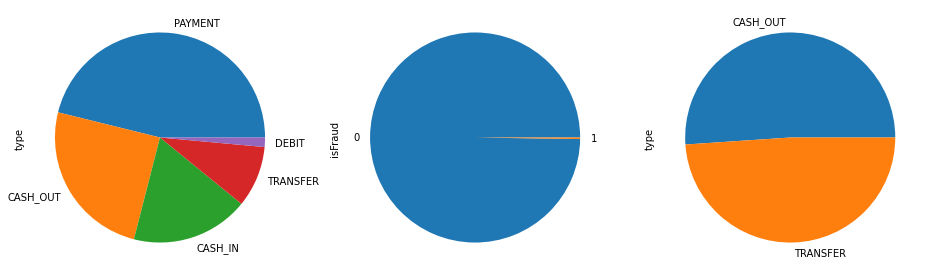

In [10]:
plt.figure(figsize=(16, 10))
transactions["type"].value_counts().plot.pie(ax=plt.subplot(1, 3, 1));
transactions["isFraud"].value_counts().plot.pie(ax=plt.subplot(1, 3, 2));
transactions[transactions["isFraud"] == 1]["type"].value_counts().plot.pie(ax=plt.subplot(1, 3,3));

In [5]:
feature_list = ["type","amount","oldbalanceOrg","newbalanceOrig"]

Per visualizzare le feauter si può procedere in diversi modi. Quello proposto in questo progetto è la creazione
di n grafici che combina 2 feature alla volta. Questo approccio può andare bene se il numero di feature è ridotto (<10)
altrimenti bisogna procedere a buon senso creando manualmente i grafici di quelle feature che potrebbero essere
in qualche modo dipendente.

Per fare questo esperimento usiamo un numero di istanze maggiori per avere una porzione di dataset più significativa.

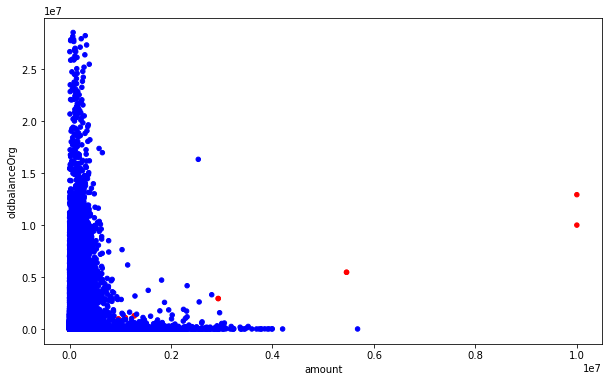

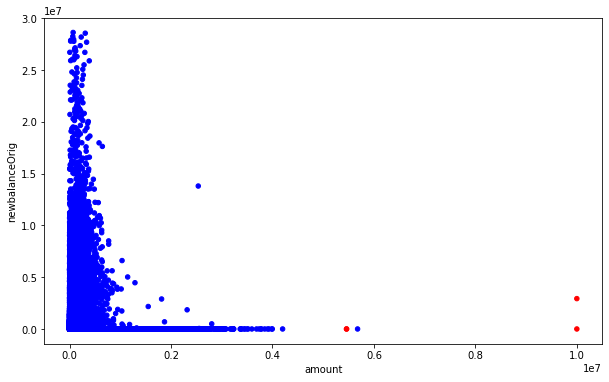

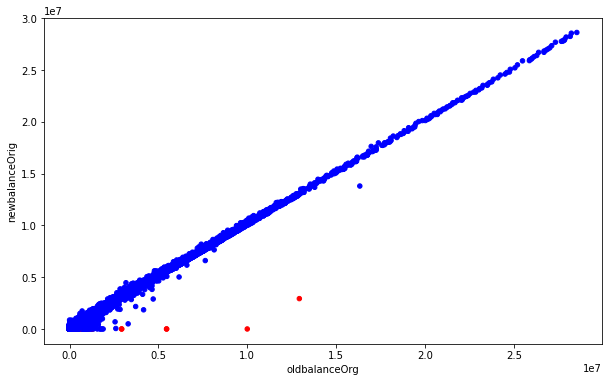

In [6]:
transactions = pd.read_csv("../data/data.csv", nrows=40_000)
tfraut_colors = transactions["isFraud"].map({0: "blue", 1: "red"})
for f_i in range(1,len(feature_list)):
     for f_j in range(f_i + 1, len(feature_list)) :        
        transactions.plot.scatter(feature_list[f_i], feature_list[f_j], c=tfraut_colors, figsize=(10, 6));

## 3 - Normalizzazione dei dati

In questo progetto non abbiamo molte pre-elaborazioni da fare, dato il numero ridotto di feature.

Per prima cosa dividiamo le feature in due categorie (perchè andranno poi trattate diversamente) :
   - Feature Numeriche : Possiamo applicare una normalizzazione dei dati per avere la stessa scala
   - Feature Categoriche : Applichiamo una categorizzazione. L'unica colonna da trattare in questo caso è 
       il tipo di transazione. Da questa operazioone de derivano altre 5.

In [11]:
feature_numeric = ["amount","oldbalanceOrg","newbalanceOrig"]
feature_categorical = ["type"]

Grazie alla classe ColumnTransformer possiamo applica entrambe queste trasformazioni in modo semplice.
L'oggeto ColumnTrasn lo memorizziamo in una variabile così lo possiamo riutilizzare anche per la creazione dei modelli nelle fasi successive

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

X = transactions[feature_list]
y = transactions[["isFraud"]]

X_train, x_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

preproc = ColumnTransformer(
    [
        ("numeric",StandardScaler(),feature_numeric),
        ("categorical",OneHotEncoder(),feature_categorical)
    ],remainder="drop")

Il risultato saranno quindi le 3 colonne numeriche ("amount", "oldbalanceOrg", "newbalanceOrig") dove abbiamo applicato una normalizzazione e le 5 colonne derivate dalla trasformazione della variabile categorica type nelle sue n componenti binarie, una per ogni valore distinto di type (in questo dataset sono 5 : CASH_IN, CASH_OUT, DEBIT, PAYMENT, TRANSFER)

In [48]:
X_sample = transactions[feature_numeric + feature_categorical]
preproc.fit_transform(X_sample)
f_names = feature_numeric + list(preproc.named_transformers_["categorical"].get_feature_names())
pd.DataFrame(
    preproc.transform(X_sample),
    columns = f_names
).head(10)

,amount,oldbalanceOrg,newbalanceOrig,x0_CASH_IN,x0_CASH_OUT,x0_DEBIT,x0_PAYMENT,x0_TRANSFER
0,-0.391364,-0.286861,-0.293213,0.0,0.0,0.0,1.0,0.0
1,-0.418243,-0.354129,-0.355699,0.0,0.0,0.0,1.0,0.0
2,-0.423917,-0.363648,-0.364295,0.0,0.0,0.0,0.0,1.0
3,-0.423917,-0.363648,-0.364295,0.0,1.0,0.0,0.0,0.0
4,-0.385201,-0.344955,-0.351042,0.0,0.0,0.0,1.0,0.0
5,-0.398178,-0.339396,-0.343878,0.0,0.0,0.0,1.0,0.0
6,-0.400571,-0.280961,-0.286211,0.0,0.0,0.0,1.0,0.0
7,-0.398030,-0.284173,-0.289697,0.0,0.0,0.0,1.0,0.0
8,-0.410963,-0.362523,-0.364295,0.0,0.0,0.0,1.0,0.0
9,-0.406537,-0.344880,-0.348161,0.0,0.0,1.0,0.0,0.0


### 3.1 - PCA

Con la decomposizione SVD (Single Value Decomposition) possiamo riportare una spazio k-dimensionale in uno spazio n-dimensionale. In questo progetto le dimensioni originali sono il numero di feature dopo aver applicato il pre-processing, quindi 8, in uno spazio bidimensionale, per poter visualizzare i dati in un classico grafico cartesiano.

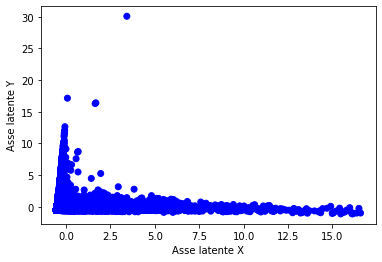

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

c_map = transactions[:X_train.values.shape[0]]["isFraud"].map({0: "blue", 1: "red"})
x_preproc = pca.fit_transform(preproc.fit_transform(X_train))

plt.scatter(x_preproc[:,0], x_preproc[:,1], c=c_map)
plt.xlabel('Asse latente X')
plt.ylabel('Asse latente Y')
plt.show()

## 4 - Modelli Predittivi

Data il grande numero di istanze in questo dataset alcuni modelli potrebbe crashare. Quindi riduciamo il dataset.

In [16]:
from sklearn.pipeline import Pipeline
transactions = pd.read_csv("../data/data.csv", nrows=20_000)

Predisponaimo alcune "Utility Function" che migliorano la leggibilità del codice e riusabilità.

In particolare definiamo alcune funzioni per il calcolo delle accuratezze.

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, r2_score, confusion_matrix, mean_squared_error

def print_matrix(classes, matrix, pad = 10):
    '''This method prints a matrix with better formatting.
    Is used for print n x n confusion matrix'''
    for i in range(len(classes)):
        if i == 0 : 
            for c in ([" "] + classes):
                print(f"{c.rjust(pad, ' ')}",end=' ')
            print()
        for j in range(len(classes)):
            if (j == 0) : 
                print(f"{classes[i].rjust(pad, ' ')}",end=' ')
            print(f"{str(matrix[i][j]).rjust(pad, ' ')}",end=' ')
        print()
    return None

def rmspe(y_real, y_pred):
    '''Root Mean Squared Percentage Error'''
    if not y_real.all() > 0 : return -1
    return np.sqrt(np.mean((y_pred /y_real - 1) ** 2))

def print_eval_regressor(X, y, model):
    '''print eval for regression model'''
    y_pred = model.predict(X)
    print(f"MSE   : {mean_squared_error(y, y_pred):12.4f}")    
    print(f"RMSPE : {rmspe(y.values, y_pred):12.4f}")
    print_eval_base(X, y, model)
    return None

def print_eval_classify(X, y, model, classes):
    '''print eval for classification model'''
    y_pred = model.predict(X)    
    cm = confusion_matrix(y, y_pred)
    print("Confusion Matrix : ")
    print_matrix(classes, cm)
    print(f"\nPRECISION  : {precision_score(y, y_pred):12.4f}")
    print(f"RECALL     : {recall_score(y, y_pred):12.4f}")
    print(f"F1-MEASURE : {f1_score(y, y_pred, average='macro'):12.4f}")
    print_eval_base(X, y, model)
    return None

def print_eval_base(X, y, model):
    '''print eval for all model, only R^2 score '''
    y_pred = model.predict(X)
    print(f"R^2   : {r2_score(y, y_pred):12.4f}")
    return None

def plot_separator_on_data(X, y, model=None):
    '''plot data into 2d space'''
    c_map = transactions[:X.values.shape[0]]["isFraud"].map({0: "blue", 1: "red"})
    X = np.array(X)
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=c_map)
    if model is not None:
        xlim, ylim = plt.xlim(), plt.ylim()
        sep_x = np.linspace(*xlim, 2)
        sep_y = separator_2d(model, sep_x)
        plt.plot(sep_x, sep_y, c="green", linewidth=2)
        plt.xlim(xlim); plt.ylim(ylim)
    return None

def separator_2d(model, x1):
    '''draw a 2d line based his equation'''
    w = model.coef_[0]
    b = model.intercept_[0]
    return -x1 * w[0] / w[1] - b / w[1]

## 4.1 - Modelli di Regressione 

In questa sezione proviamo ad addestrare modelli di regressione per risolvere il problema.

Per usare il notebook bisogna aver installato le seguetni librerie. Se non si dispongono scommentare questa parte ed eseguire la cella.

In [33]:
#%conda install XGBoost
#%conda install Lightgbm
#%conda install Catboost

### 4.1.1 - Ridle Regression

Come primo modello vediamo se una Regressione Lineare con regolarizzazione L1 e Kernel Trick può risolvere il problema.

In [36]:
from sklearn.linear_model import Ridge

model = Pipeline([
    ("preproc", preproc),
    ("regRidge", Ridge(alpha=1))
])

model.fit(X_train, y_train)
print_eval_regressor(x_val, y_val, model)

MSE   :       0.0027
RMSPE :      -1.0000
R^2   :       0.0174


Il modello da scarsi risultati perchè, anche con una funzione kernel, il problema non è linearmente separabile

### 4.1.2 - Modelli di Regressione Avanzati

Tentiamo di creare degli alberi di regressione con le migliori tecnologie come XGBoost, LightBoost e Catboost

In [37]:
from xgboost import XGBRegressor

xgbm = XGBRegressor(objective='reg:squarederror', 
                    learning_rate = 0.01577, 
                    reg_lambda=0.008, 
                    reg_alpha=0.0001, 
                    n_estimators=1025, 
                    verbose_eval=False)
model = Pipeline([
    ("preproc", preproc),
    ("XGBRegressor", xgbm)
])
model.fit(X_train, y_train)
print_eval_regressor(x_val, y_val, model)

[13:16:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose_eval" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


MSE   :       0.0020
RMSPE :      -1.0000
R^2   :       0.2721


In [41]:
from lightgbm import LGBMRegressor

model = Pipeline([
    ("preproc",preproc),
    ("LGBM", LGBMRegressor(boosting_type='rf',n_estimators=1000,max_depth=-1,bagging_freq =10,bagging_fraction=0.95))
])

model.fit(X_train, y_train.values.ravel())
print_eval_regressor(x_val, y_val, model)

[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
MSE   :       0.0022
RMSPE :      -1.0000
R^2   :       0.2009


In [42]:
from catboost import CatBoostRegressor

model = Pipeline([
    ("preproc", preproc),
    ("CATBOOST", CatBoostRegressor(n_estimators=91))
])

model.fit(X_train, y_train);
print_eval_regressor(x_val, y_val, model)

Learning rate set to 0.432862
0:	learn: 0.0426549	total: 3.4ms	remaining: 306ms
1:	learn: 0.0413614	total: 6.36ms	remaining: 283ms
2:	learn: 0.0408786	total: 9.23ms	remaining: 271ms
3:	learn: 0.0376980	total: 12.3ms	remaining: 267ms
4:	learn: 0.0362080	total: 15.3ms	remaining: 264ms
5:	learn: 0.0357071	total: 18.2ms	remaining: 257ms
6:	learn: 0.0345664	total: 21ms	remaining: 252ms
7:	learn: 0.0338962	total: 23.9ms	remaining: 248ms
8:	learn: 0.0336486	total: 26.8ms	remaining: 244ms
9:	learn: 0.0330622	total: 29.8ms	remaining: 242ms
10:	learn: 0.0325795	total: 33ms	remaining: 240ms
11:	learn: 0.0321710	total: 36ms	remaining: 237ms
12:	learn: 0.0318235	total: 39ms	remaining: 234ms
13:	learn: 0.0311395	total: 41.8ms	remaining: 230ms
14:	learn: 0.0308918	total: 44.8ms	remaining: 227ms
15:	learn: 0.0306324	total: 47.6ms	remaining: 223ms
16:	learn: 0.0300806	total: 50.8ms	remaining: 221ms
17:	learn: 0.0297263	total: 53.6ms	remaining: 217ms
18:	learn: 0.0294781	total: 56.4ms	remaining: 214ms
1

Come possiamo vedere anche gli alberi di regressione non funzionano bene.

## 4.3 Modelli di Classificazione

Passiamo agli algoritmi di classificazione

### 4.3.1 Alberi Decisionali

Confusion Matrix : 
              isFraud     Honest 
   isFraud      13291          6 
    Honest         28          9 

PRECISION  :       0.6000
RECALL     :       0.2432
F1-MEASURE :       0.6724
R^2   :       0.0785


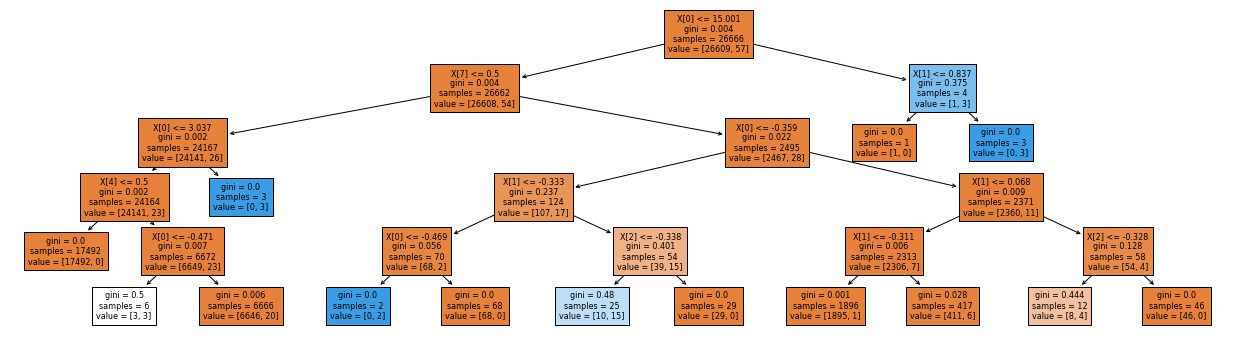

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

classes = ["isFraud", "Honest"]

model = Pipeline([
    ("preproc", preproc),
    ("decisionTree", DecisionTreeClassifier(max_depth=5,random_state=43))
])

model.fit(X_train, y_train)
print_eval_classify(x_val, y_val, model, classes)

plt.figure(figsize=(22, 6))
plot_tree(model.named_steps["decisionTree"], max_depth=5, filled=True, fontsize=8);

I DecisionTree funzionano molto meglio dei modelli di regressione.

Vediamo quali spit fa stampando in maniera testuale l'albero di classificazione :

In [49]:
from sklearn.tree import export_text
print(export_text(model.named_steps["decisionTree"], feature_names=f_names))

|--- amount <= 15.00
|   |--- x0_TRANSFER <= 0.50
|   |   |--- amount <= 3.04
|   |   |   |--- x0_CASH_OUT <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- x0_CASH_OUT >  0.50
|   |   |   |   |--- amount <= -0.47
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- amount >  -0.47
|   |   |   |   |   |--- class: 0
|   |   |--- amount >  3.04
|   |   |   |--- class: 1
|   |--- x0_TRANSFER >  0.50
|   |   |--- amount <= -0.36
|   |   |   |--- oldbalanceOrg <= -0.33
|   |   |   |   |--- amount <= -0.47
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- amount >  -0.47
|   |   |   |   |   |--- class: 0
|   |   |   |--- oldbalanceOrg >  -0.33
|   |   |   |   |--- newbalanceOrig <= -0.34
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- newbalanceOrig >  -0.34
|   |   |   |   |   |--- class: 0
|   |   |--- amount >  -0.36
|   |   |   |--- oldbalanceOrg <= 0.07
|   |   |   |   |--- oldbalanceOrg <= -0.31
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- oldbalanceOrg >  

### 4.3.2 - Logistic Loss

In [ ]:
from sklearn.linear_model import LogisticRegression

model_RegLos = Pipeline([
    ("preproc", preproc),
    ("RegLoss", LogisticRegression(solver="saga", random_state=11, class_weight={1:45}))
])

model_RegLos.fit(X_train, y_train)

print_eval_classify(x_val, y_val, model, classes)

Di seguito voglio creare un modello, uguale al precedente, con solo due feature per cercare di far capire
come vengono fatti gli split e come l'algoritmo divide lo spazio.
Non posso farlo con tutte le feature perchè sono > 2

C:\Users\Federico\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Confusion Matrix : 
              isFraud     Honest 
   isFraud      13286         11 
    Honest         35          2 

PRECISION  :       0.1538
RECALL     :       0.0541
F1-MEASURE :       0.5391
R^2 :      -0.2467


C:\Users\Federico\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


<Figure size 1584x432 with 0 Axes>

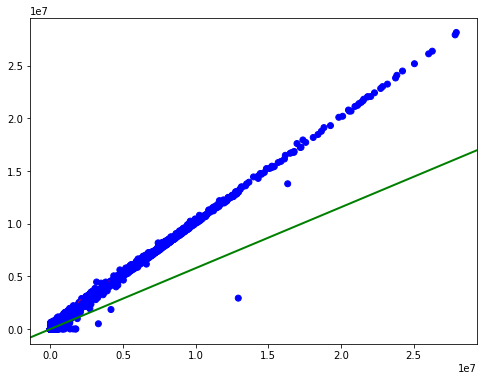

In [56]:
X_dt = transactions[["oldbalanceOrg","newbalanceOrig"]]
y_dt = transactions[["isFraud"]]

X_train_dt, x_val_dt, y_train_dt, y_val_dt = train_test_split(X_dt, y_dt, test_size=1/3, random_state=42)

model_dt = Pipeline([
    ("preproc", StandardScaler()),
    ("RegLoss", LogisticRegression(solver="saga", random_state=42, class_weight={1:45}))
])

model_dt.fit(X_train_dt, y_train_dt)
print_eval_classify(x_val_dt, y_val_dt, model_dt, classes)

plt.figure(figsize=(22, 6))

plot_separator_on_data(x_val_dt, y_val_dt, model_dt.named_steps["RegLoss"]);

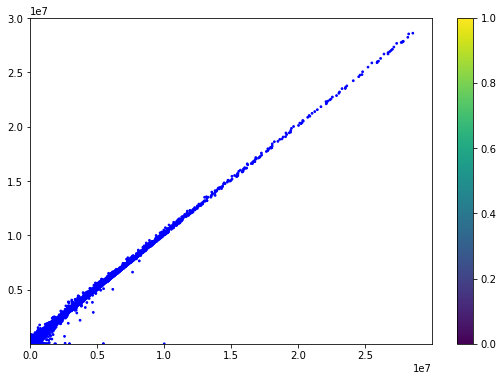

In [63]:
mx1, mx2 = np.meshgrid(np.linspace(0, 2700, 100), np.linspace(0, 0.22, 100))
my = model_dt.predict_proba(np.c_[mx1.ravel(), mx2.ravel()])[:, 1].reshape(mx1.shape)
c_map = transactions[:X_train_dt.values.shape[0]]["isFraud"].map({0: "blue", 1: "red"})
plt.figure(figsize=(9, 6))
plt.contourf(mx1, mx2, my, cmap="summer")
plt.scatter(*X_train_dt.values.T, c=c_map, s=3)
plt.colorbar();

### 4.3.3 XGBClassifier

In [ ]:
from xgboost import XGBClassifier 

xgbm_c = XGBClassifier(objective='reg:squarederror', 
                    learning_rate = 0.01577, 
                    reg_lambda=0.008, 
                    reg_alpha=0.0001, 
                    n_estimators=1025, 
                    verbose_eval=False)
model = Pipeline([
    ("preproc", preproc),
    ("XGBClassifier", xgbm_c)
])
model.fit(X_train, y_train)

print_eval_classify(x_val, y_val, model, classes)

### 4.3.4 Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC

model_svm = Pipeline([
    ("preproc", preproc),
    ("SVM", SVC(kernel='rbf',random_state=42))
])

model_svm.fit(X_train, y_train)

print_eval_classify(x_val, y_val, model, classes)

## 4.4 - Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X_nn = transactions[["type","amount","oldbalanceOrg","newbalanceOrig"]]
y_nn = transactions[["isFraud"]]
X_train_nn, x_val_nn, y_train_nn, y_val_nn = train_test_split(X_nn, y_nn, test_size=1/3, random_state=42)

X_scaler = ColumnTransformer([
        ("numeric",StandardScaler(),["amount", "oldbalanceOrg", "newbalanceOrig"]),
        ("categorical",OneHotEncoder(),["type"])
    ],remainder="drop")

Y_scaler = StandardScaler()

X_train_nn = X_scaler.fit_transform(X_train)
x_val_nn = X_scaler.transform(x_val)
y_train_nn = Y_scaler.fit_transform(y_train)
y_val_nn = Y_scaler.transform(y_val.values)

model_nn = Sequential([
    Dense(8, activation="relu", input_dim=8),
    Dense(1)
])
model_nn.summary()
model_nn.compile(optimizer="adam",loss="mean_squared_error")
fit_history = model_nn.fit(X_train_nn, y_train_nn, batch_size=10, epochs=15)
print_eval_base(x_val_nn, y_val_nn, model_nn)

In [ ]:
plt.plot(fit_history.history["loss"], "ro-")
plt.legend(["Loss (Mean Square Error)"])
plt.xlabel("Epochs");

In [ ]:
def build_nn(nodes, inpDim):
    model = Sequential([
        Dense(nodes, activation="relu", input_dim=inpDim),
        Dense(256, activation="softmax"),
        Dense(128, activation="relu"),
        Dense(64, activation="relu"),
        Dense(1)
    ])
    model.compile(optimizer="adam", loss="mean_squared_error")
    model.summary()
    return model

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

model_nn = Pipeline([
    ("preproc", preproc),
    ("NN", KerasRegressor(build_fn=build_nn, nodes=512, inpDim=8, epochs=20, batch_size=1000))
])
model_nn.fit(X_train, y_train)
print_eval_base(x_val, y_val, model_nn)

## 5 - Tuning degli Iperparametri

Per questa parte utilizziamo una porzione più ampia del datataset

In questa parte andremo ad suddividere il dataset in 3 parti e le useremo nel seguente modo :
   - Training Set : Per addestrare i modelli
   - Validation Set : Per vericare l'accuratteza dei modelli su dati mai visti in fase di training
   - Test Set : Per calcolare la confidenza

In [60]:
from sklearn.model_selection import GridSearchCV, KFold
kf = KFold(3, shuffle=True, random_state=42)

transactions = pd.read_csv("../data/data.csv", nrows=200_000)
X = transactions[feature_list]
y = transactions[["isFraud"]]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=1/3, random_state=42)

I modelli che meglio si sono comportati per questo esperimento sono stati, come ci si poteva aspettare,
i modelli di classificazione. Andiamo quindi a cercare i migliori iperparametri per i seguenti modelli : 
 - Alberi Decisionali
 - Logistic Loss
 - Support Vector Machines (SVM)

In [ ]:
grid = {
    "XGBoost__learning_rate": [0.01577,0.001577,0.01477,0.04577]
}

gs = GridSearchCV(model_XGBoost, grid, cv=kf)
gs.fit(X_train, y_train);

In [ ]:
grid = {
    "SVM__degree": [3, 4],
    "SVM__kernel": ['linear', 'poly', 'rbf']
}

gs = GridSearchCV(model_svm, grid, cv=kf)
gs.fit(X_train, y_train);

In [ ]:
grid = {
    "SVM__degree": [3, 4],
    "SVM__kernel": ['linear', 'poly', 'rbf']
}

gs = GridSearchCV(model_svm, grid, cv=kf)
gs.fit(X_train, y_train);

## 6 - Conclusioni 

Possiamo stimare l'accuratezza sui nuovi dati con un processo Bernoulliano :

In [ ]:
def bernoulli_process(confidence) :
    z = 
    f = S / N
    p_ub = (f + z**2/(2*N) + z*np.sqrt(f/N - f**2/N + z**2/4*N**2)) / (1+z**2/N)
    p_lb = (f + z**2/(2*N) - z*np.sqrt(f/N - f**2/N + z**2/4*N**2)) / (1+z**2/N)
    return p_ub, p_lb

## 7 - Deployment

In [ ]:
Il modello poi può essere utilizzato da una web-app oppure una applicazione mobile 

## 8- Link alle risorse
#### Link al dataset di kaggle
https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset